### EDA (Exploratory Data Analysis) Test - Annette Bazan
1. Rename LastName to your actual last name, 
2. Change FirstName and LastName to your name in the title,
3. Write your code inside each question in the cell, 
4. After you answer all questions, restart the Kernel and run all cells, 
5. Download an HTML version of your completed Notebook,
6. Answer the questions inside the cells for questions # 18, 19, and 20,   
7. Submit completed test via Canvas submission window.

### Introduction:
1. **Context:** The dataset contains information about the fashion retail business. 
2. **Objectives:** Gaining insights about customer purchasing behavior, overall sales performance, and customer satisfaction.
3. **Data Description:**
    - Customer Reference ID: customer ID
    - Item Purchased: type of purchased item
    - Purchase Amount: amount paid for the item in USD
    - Data Purchase: data item was purchased
    - Review Rating: the customer's rating
    - Payment Method: type of payment method

### Importing Libraries

In [1]:
# 1. import all needed libraries

# general libraries
import numpy as np
import pandas as pd
import math

# data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# suppressing warnings
import warnings 
warnings.filterwarnings('ignore')

### Loading (Reading) Dataset

In [2]:
# 2. load the fashion_sales dataset and name it df
df = pd.read_csv('fashion_sales.csv')

In [3]:
# 3. create a copy of df and name it fashion 
fashion = df.copy('df')

### EDA (Exploratory Data Analysis)

##### A) Basic Data Exploration

In [4]:
# 4. display the first 10 rows of fashion dataset
fashion.head(10)

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,4018,Handbag,4619.0,05-02-2023,NaN,Credit Card
1,4115,Tunic,2456.0,11-07-2023,2.0,Credit Card
2,4019,Tank Top,2102.0,23-03-2023,4.1,Cash
3,4097,Leggings,3126.0,15-03-2023,3.2,Cash
4,3997,Wallet,3003.0,27-11-2022,4.7,Cash
5,4080,Onesie,2914.0,11-12-2022,4.5,Credit Card
6,4055,Jacket,2571.0,08-07-2023,1.3,Cash
7,3973,Trousers,2419.0,10-11-2022,4.6,Cash
8,4044,Jeans,4771.0,19-05-2023,4.1,Cash
9,4010,Loafers,4233.0,11-06-2023,NaN,Credit Card


In [5]:
# 5. dispaly the last 5 rows of fashion dataset
fashion.tail()

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
3395,4118,Shorts,37.0,09-07-2023,2.7,Cash
3396,4056,Slippers,176.0,16-03-2023,2.5,Cash
3397,3991,Onesie,NaN,03-10-2022,2.4,Credit Card
3398,4042,Sandals,128.0,01-01-2023,1.8,Cash
3399,4001,Backpack,115.0,22-03-2023,1.4,Cash


In [6]:
# 6. display 5 attributs of fashion dataset
print('Total columns:',fashion.columns)
print('Dtypes:', fashion.dtypes)
print('Shape of dataset:',fashion.shape)
print('Total size:',fashion.size)
print('Total dimensions:', fashion.ndim)

Total columns: Index(['Customer Reference ID', 'Item Purchased', 'Purchase Amount (USD)',
       'Date Purchase', 'Review Rating', 'Payment Method'],
      dtype='object')
Dtypes: Customer Reference ID      int64
Item Purchased            object
Purchase Amount (USD)    float64
Date Purchase             object
Review Rating            float64
Payment Method            object
dtype: object
Shape of dataset: (3400, 6)
Total size: 20400
Total dimensions: 2


In [7]:
# 7. display more information about the fashion dataset
fashion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Reference ID  3400 non-null   int64  
 1   Item Purchased         3400 non-null   object 
 2   Purchase Amount (USD)  2750 non-null   float64
 3   Date Purchase          3400 non-null   object 
 4   Review Rating          3076 non-null   float64
 5   Payment Method         3400 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 159.5+ KB


In [8]:
# 8. What are the dtypes in the fashion dataset? show your code.
fashion.dtypes

Customer Reference ID      int64
Item Purchased            object
Purchase Amount (USD)    float64
Date Purchase             object
Review Rating            float64
Payment Method            object
dtype: object

In [9]:
# 9. display the statistical summary of the fashion dataset and transpose the output
fashion.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Reference ID,3400.0,4039.660588,48.122583,3957.0,3997.0,4040.0,4081.00,4122.0
Purchase Amount (USD),2750.0,156.709818,419.536669,10.0,57.0,110.0,155.75,4932.0
Review Rating,3076.0,2.999057,1.156505,1.0,2.0,3.0,4.00,5.0


In [10]:
# 10. display the summary of the object variables in the fashion dataset
fashion.describe(include='object')

,Item Purchased,Date Purchase,Payment Method
count,3400,3400,3400
unique,50,365,2
top,Belt,22-09-2023,Credit Card
freq,90,17,1770


In [11]:
# 11. examine the missing values in the fashion dataset
fashion.isnull().sum()

Customer Reference ID      0
Item Purchased             0
Purchase Amount (USD)    650
Date Purchase              0
Review Rating            324
Payment Method             0
dtype: int64

##### B) Data Visualization

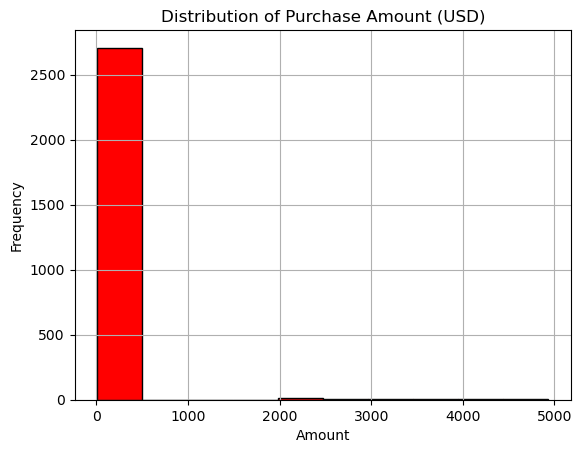

In [12]:
# 12. create a histogram of Purchased Amount to view the data distribution
# Add a title: Distribution of Purchase Amount (USD)
# Add x label: Amount
# Add y label: Frequency
fashion['Purchase Amount (USD)'].hist(edgecolor='black',color = 'r')
plt.title('Distribution of Purchase Amount (USD)')
plt.xlabel('Amount')
plt.ylabel('Frequency');

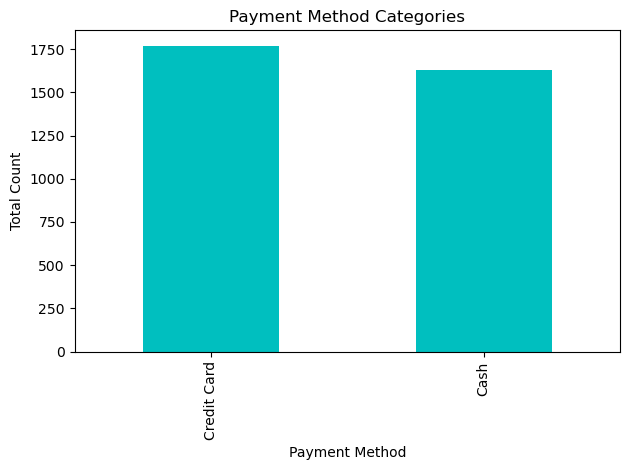

In [13]:
# 13. create a bar plot to examine the categories in the Payment Method variable
# apply the cyne ('c') color to the bars
# hint: first display the different categories with the total values in each category
payment_counts = fashion['Payment Method'].value_counts()

payment_counts.plot(kind='bar', color='c')
plt.title('Payment Method Categories')
plt.xlabel('Payment Method')
plt.ylabel('Total Count')
plt.tight_layout();

In [14]:
# 14. create a correlation table
# first create a new dataset containing the two numeric variables of Purchase Amount and Review Rating only and name it fashion2
fashion2 = fashion[['Purchase Amount (USD)', 'Review Rating']]
correlation_table = fashion2.corr()
correlation_table

,Purchase Amount (USD),Review Rating
Purchase Amount (USD),1.000000,0.045135
Review Rating,0.045135,1.000000


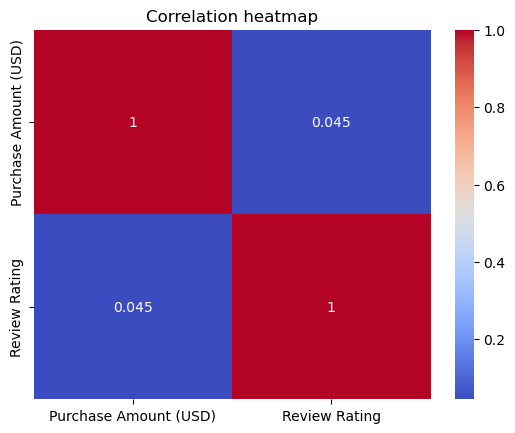

In [15]:
# 15. create a correlation heatmap using the fashion2 dataset
correlation= fashion2.corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap');

##### C) Handling Missing Values

In [16]:
# 16. create a copy of fashion dataset and name it fashion3 
# then, impute the missing values of Purchase Amount variable in fashion3 using the median()
fashion3 = fashion.copy()

fashion3['Purchase Amount (USD)'].fillna(fashion3['Purchase Amount (USD)'].median(), inplace=True)

In [17]:
# 17. create a copy fashion dataset and name it fashion4
# then, drop all missing values in fashion4
fashion4 = fashion.copy()

fashion4.dropna(inplace=True)

##### D) Mining Questions

# 18. Which item has been purchased the most in this fashion dataset?
# answer here: **Belt**

# 19. What is the highest purchase amount (USD) paid in this dataset? 
# answer here: **$4932.00**

In [18]:
# 20. Which review rating (1-5) has the highest number of reviews? And what is the number of reviews?
# answer here: **Rating 4.1 has the highest number of reviews: 94**

# load the dataset
df = pd.read_csv('fashion_sales.csv')  

# Group by the "Review Rating" column and count the number of reviews for each rating
rating_counts = df['Review Rating'].value_counts()

# Output the rating with the highest number of reviews
highest_rating = rating_counts.idxmax()  # Rating with the highest number of reviews
highest_count = rating_counts.max()     # Number of reviews for that rating

print(f"Rating {highest_rating} has the highest number of reviews: {highest_count}")

Rating 4.1 has the highest number of reviews: 94


### End of EDA Test. 